In [3]:
import pandas as pd

df = pd.read_csv("..\\Data\\Real_Estate.csv")
df.info

<bound method DataFrame.info of                Transaction date  House age  \
0    2012-09-02 16:42:30.519336       13.3   
1    2012-09-04 22:52:29.919544       35.5   
2    2012-09-05 01:10:52.349449        1.1   
3    2012-09-05 13:26:01.189083       22.2   
4    2012-09-06 08:29:47.910523        8.5   
..                          ...        ...   
409  2013-07-25 15:30:36.565239       18.3   
410  2013-07-26 17:16:34.019780       11.9   
411  2013-07-28 21:47:23.339050        0.0   
412  2013-07-29 13:33:29.405317       35.9   
413  2013-08-01 09:49:41.506402       12.0   

     Distance to the nearest MRT station  Number of convenience stores  \
0                             4082.01500                             8   
1                              274.01440                             2   
2                             1978.67100                            10   
3                             1055.06700                             5   
4                              967.40000     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [6]:
# Descriptive statistics of the dataset
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [7]:
'''Checking if there are any NULL Values in the Data Set'''
'''On All the columns the NULL value count is Zero'''
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

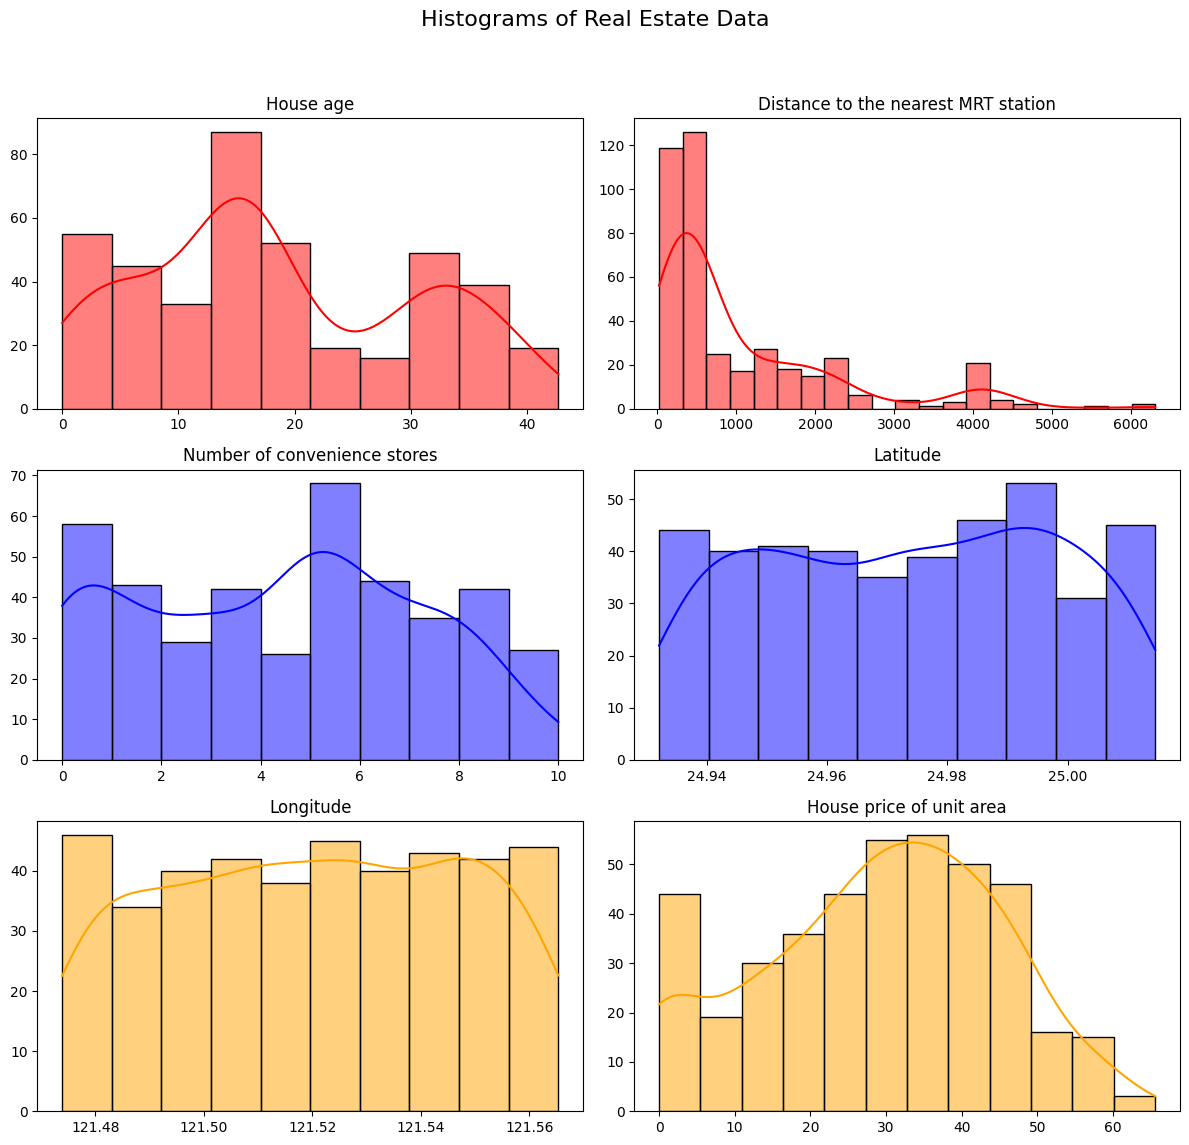

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

colors = ["Red","Blue","Orange"]
# After dividing by 2, // => rounds it to nearest integer
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2],color=colors[i//2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [9]:
"""
HOUSE AGE: Number of Houses based on House age is a bit more on to 0 to 20 years. Fairly uniform distribution, but
           more houses concentrated towards lower age.
DISTANCE TO MRT STATUION: Skewed towards the left, implying more houses are near to the stations, as indicated by 
           more concentration towards lower distances. There is a tail extending indicating few houses are far from
           MRT stations.
CONVIENCE STORES: There are few peaks at specific counts. We can see max peak at 5 stores, indicating close to 70
            houses have around 5 stores.
LATITUDE and LONGITUDE: We can see concentrated distributions, indicating most houses are located at limited 
            locations.
HOUSE PRICE PER UNIT AREA: Bit right skewed, more houses are available at lower prices and starts to taper at higher
            values indicating fewer houses at higher prices.
"""
df.corr(numeric_only=True)

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


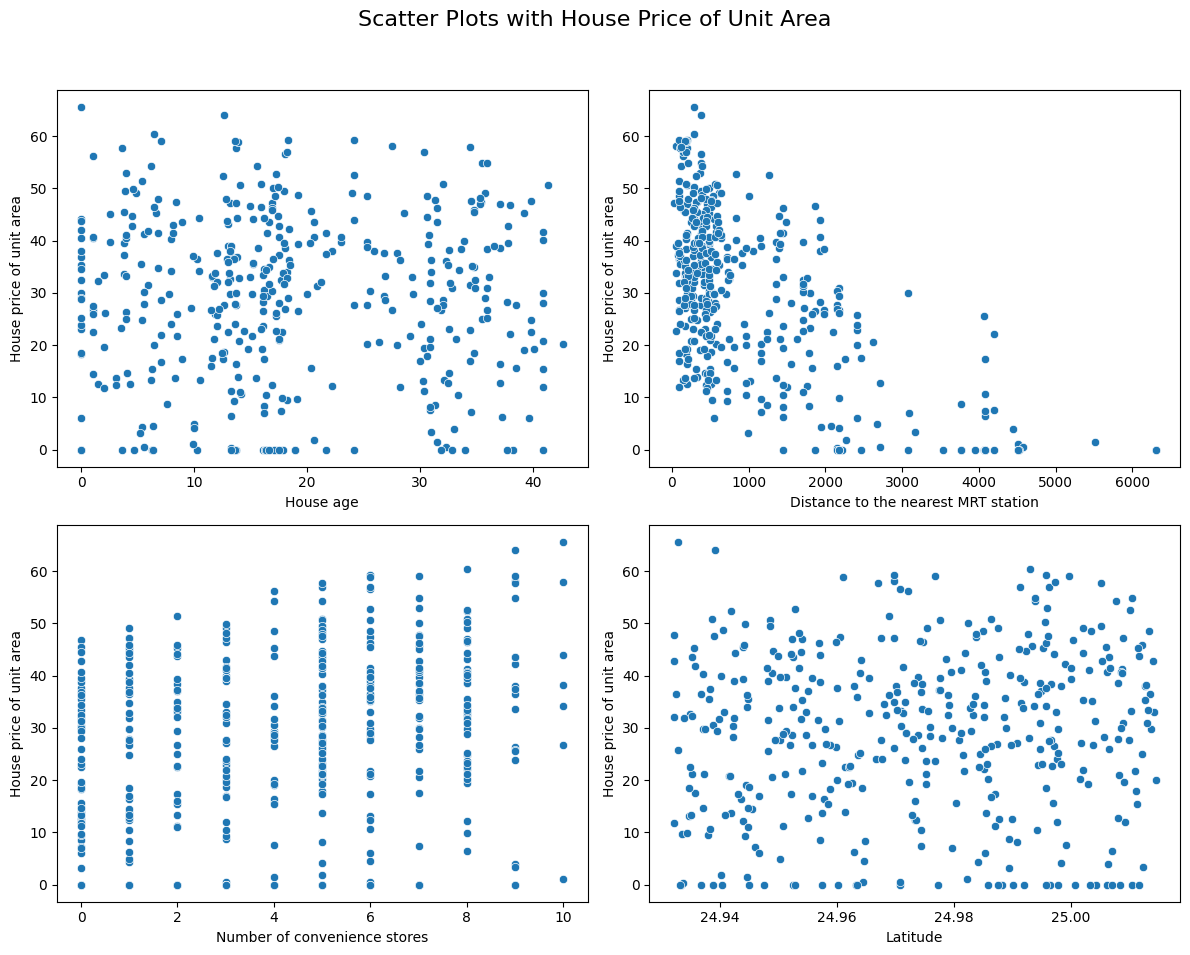

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)
y_column = "House price of unit area"
# Scatter plot for each variable against the house price
# sns.scatterplot(data=df, x='House age', y=y_column, ax=axes[0, 0], hue=y_column)
# sns.scatterplot(data=df, x='Distance to the nearest MRT station', y=y_column, ax=axes[0, 1],hue=y_column)
# sns.scatterplot(data=df, x='Number of convenience stores', y=y_column, ax=axes[1, 0],hue=y_column)
# sns.scatterplot(data=df, x='Latitude', y=y_column, ax=axes[1, 1],hue=y_column)

sns.scatterplot(data=df, x='House age', y=y_column, ax=axes[0, 0])
sns.scatterplot(data=df, x='Distance to the nearest MRT station', y=y_column, ax=axes[0, 1])
sns.scatterplot(data=df, x='Number of convenience stores', y=y_column, ax=axes[1, 0])
sns.scatterplot(data=df, x='Latitude', y=y_column, ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Text(0.5, 1.0, 'Correlation Matrix')

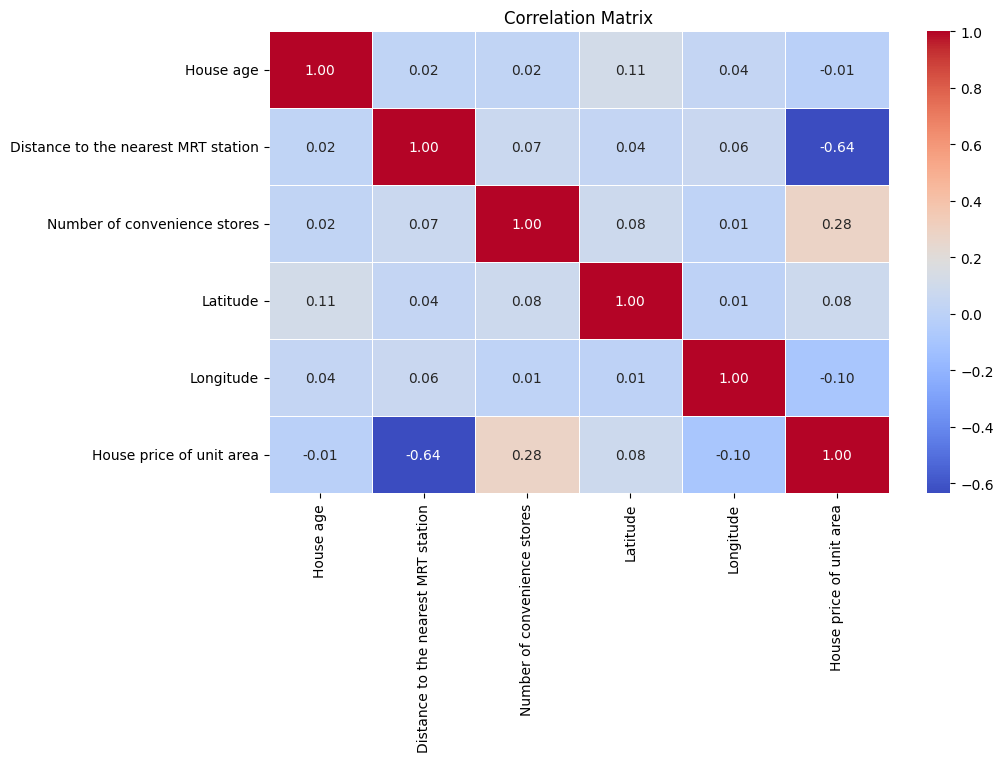

In [11]:
"""
HOUSE AGE VS PRICE: There is no strong linear relationship here, from the plot we can see very new houses 
                    and very old houses are costlyt.
DISTANCE FROM MRT VS PRICE: We can see strong negative linear relationship between the variables, closer to the MRT 
                    station, higher is the price.
NUMBER OF CONVIENCE STORES VS PRICE: Weak positive relationship is observed, more stores has some positive
                    affect on the price and houses tend to be a bit costly.
LATITUDE VS PRICE: There is a weak relationship between these variables, as we can see certain latitudes have higher
                    and lower prices, probably indicating dependency on the neighborhood.
"""

# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Actual vs. Predicted House Prices')

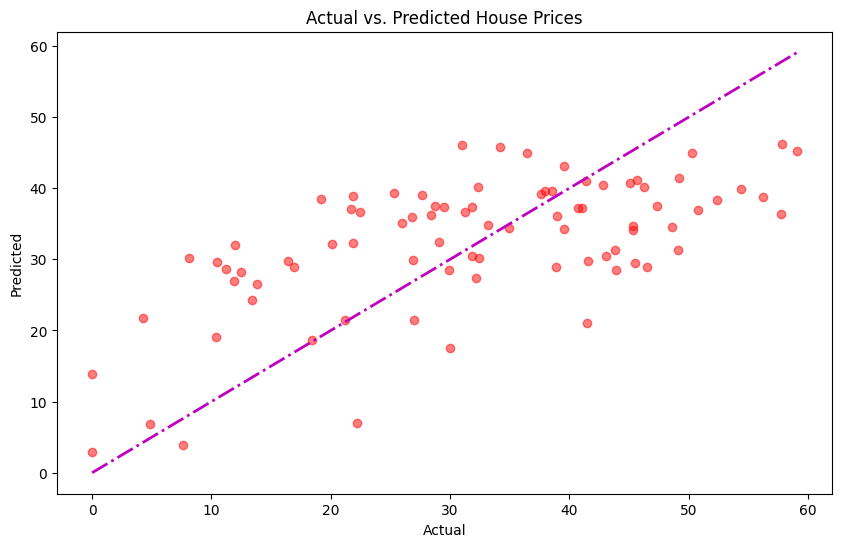

In [21]:
"""
As few columns have close to no affect on the price, removing below columns from X.
    House Age: Has a Correlation of -0.01, very insignificant from above heat map, removing this column.
Most significant columns appears to be 'Distance from Nearest MRT' and 'Number of Convience Stores' with correlation
    of -0.64 and 0.28.
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(labels=['Transaction date','House age','House price of unit area'],axis=1)
y = df['House price of unit area']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

# Making predictions using the linear regression model
y_pred = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="Red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm-.', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')



In [13]:
"""
The Line indicates where the predicted and actual values would be same. From above graph, we can see few points
    deviate away from the line, indicating significant deviation between predicted and actual values. More points 
    are concentrated around the line indicating accurate predictions to some reasonable extent.
"""
import numpy as np

r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
rmse, r2

(11.442350895750701, 0.3863018343438346)